## Project 2: Wholesale Customer
#### Done by: Kishan Patel (200527734)

Goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with.

__________________________________________________________________________________________________________

### Importing libraries 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

### Loading the dataset

In [2]:
df= pd.read_csv('Wholesale_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Performing Exploratory Data Analysis 

In [3]:
df.shape #checking the number of columns and rows

(440, 8)

In [4]:
#Checking if dataset has missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

We can see that there is no null values in the dataset.

In [5]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


From the summary we can notice that all the columns has non-null integer datatype

In [6]:
#Summary statistics of the dataset
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
#Checking the number of unique values in the dataset. 
df.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

From the above-shown results, we can infer that 'Channel', and 'Region' contain categorical data, whereas other columns contain continuous data.

In [8]:
df['Channel'].unique() #Checking the unique values in the channel column.

array([2, 1], dtype=int64)

In [9]:
df['Channel'].value_counts() #Number of unique values in channel column.

1    298
2    142
Name: Channel, dtype: int64

Channel column has two unique values which is 1 and 2.

In [10]:
df['Region'].unique() #Checking the unique values in the region column.

array([3, 1, 2], dtype=int64)

In [11]:
df['Region'].value_counts() #Number of unique values in Region column.

3    316
1     77
2     47
Name: Region, dtype: int64

Region column has three unique values which is 1,2 and 3.

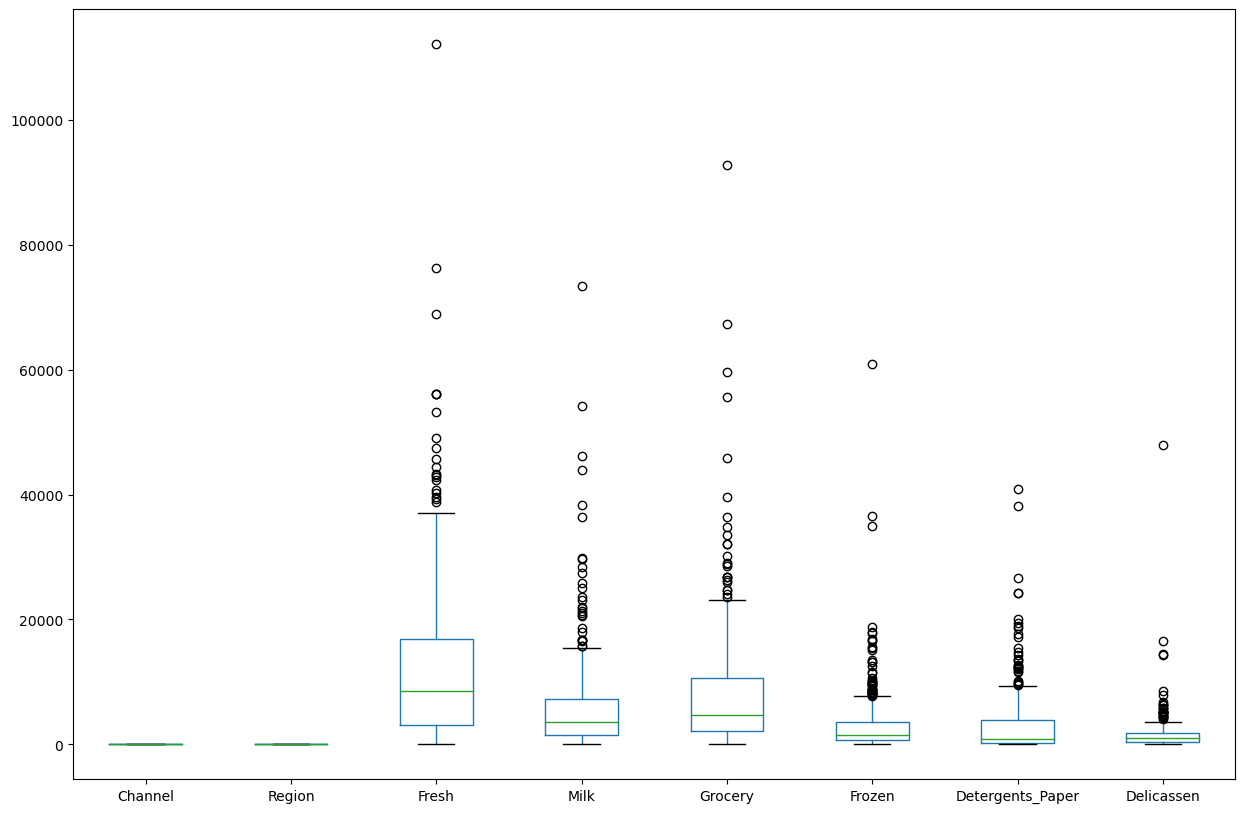

In [12]:
#Outlier Detection

fig = plt.figure(figsize = (15,10))
boxplot = df.boxplot(column=[i for i in list(df)], grid = False)

Removing the outliers may affect our dataset significantly and we may lose some important information since our dataset is small, so we are keeping them

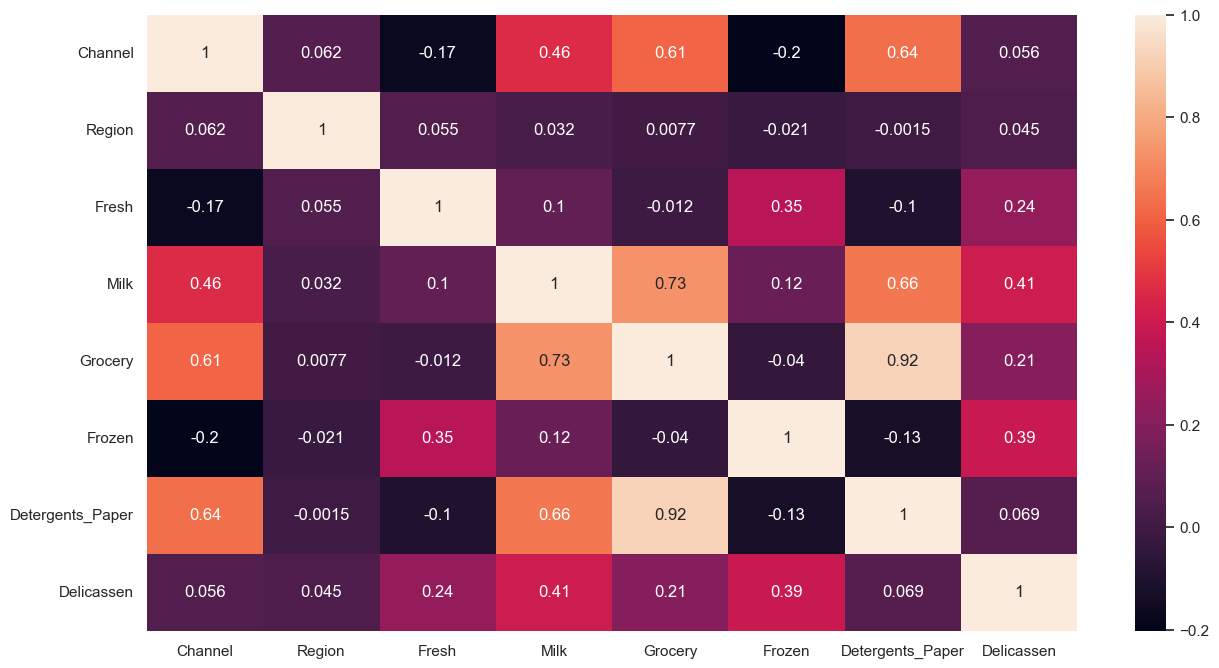

In [13]:
#Correlation Analysis

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(method='pearson'),annot = True);

From the figure shown above, we can infer some correlation between features:

Grocery and Detergent_Paper are highly correlated, followed by grocery and milk.
_______________________________________________________________________________________

Looking at the dataset, it seems like cleaning is not required, so we are jumping directly towards feature scaling.
___________________________________________________________________________________________________________________

#### Implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScaler and StandardScaler). Choose one of the Scaler to proceed ahead and provide reasoning as to why it was selected?

### Feature Scaling using Standard Scalar Method

In [14]:
df1 = df.copy()

In [15]:
from sklearn.preprocessing import StandardScaler

df_columns = df1.columns
features = df1[df_columns]

std_scaler = StandardScaler().fit(features.values)
std_features = std_scaler.transform(features.values)
std_scaled_features = pd.DataFrame(std_features, columns = df_columns)
std_scaled_features.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [16]:
std_scaled_features.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


<AxesSubplot:ylabel='Density'>

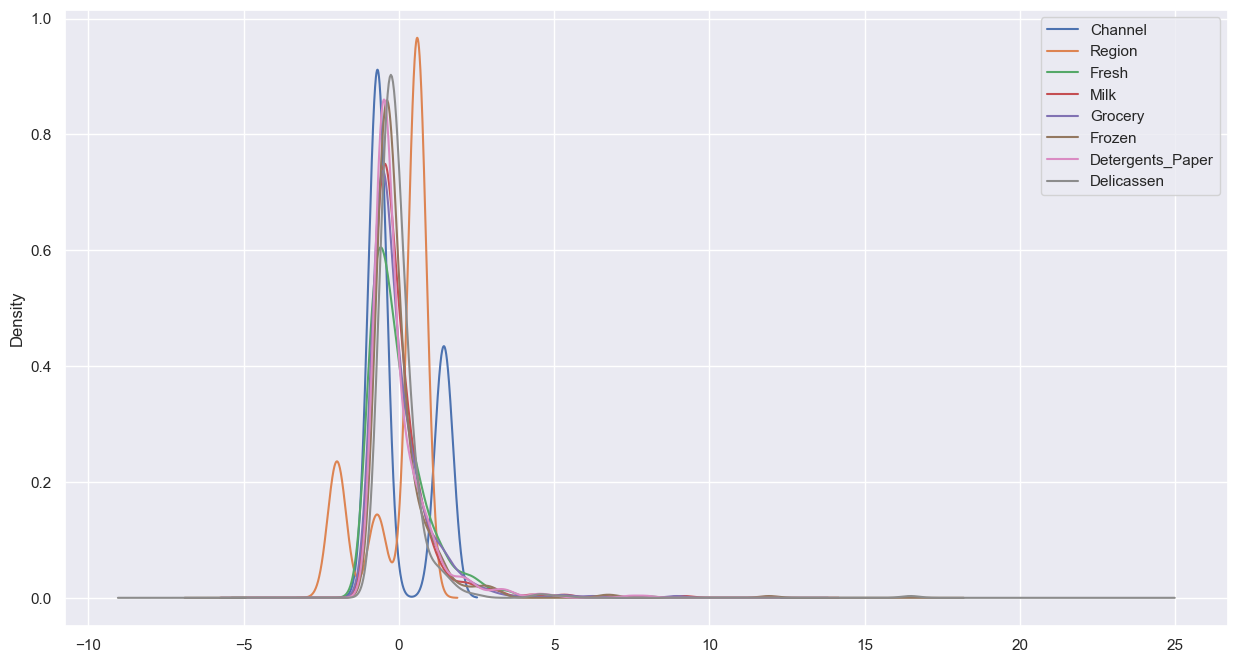

In [17]:
#Plotting the scaled features which we scaled using Standard Scalar method

pd.DataFrame(std_scaled_features).plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

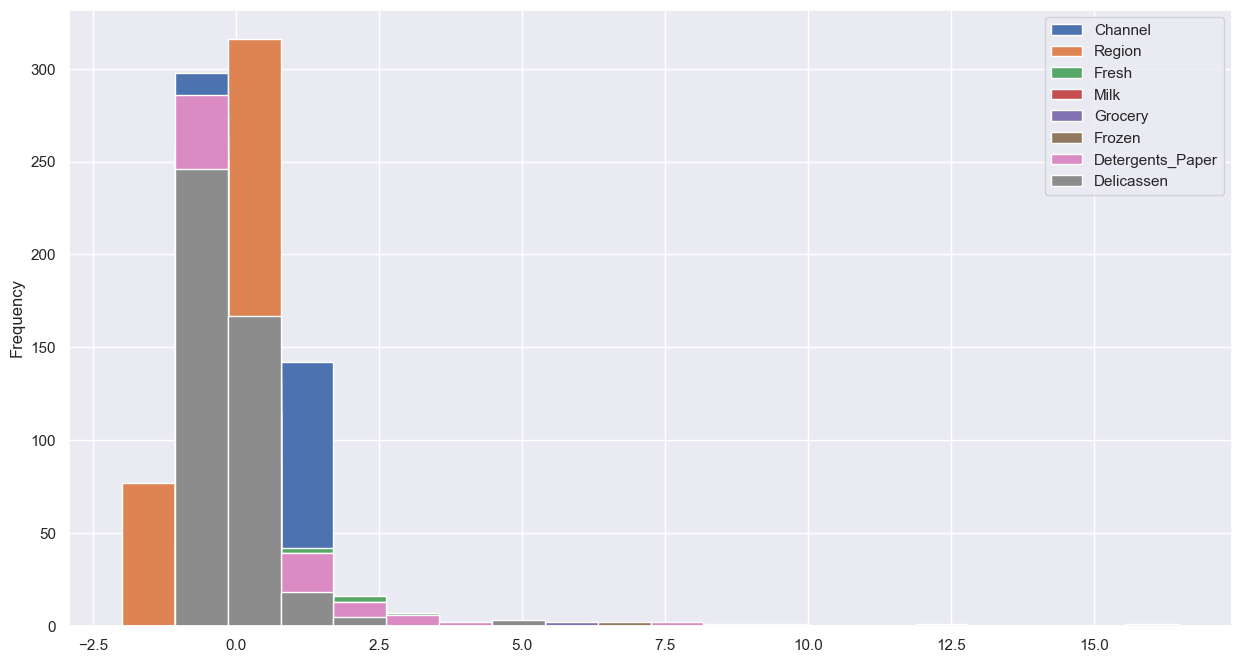

In [18]:
#Plotting the scaled features which we scaled using Standard Scalar method

pd.DataFrame(std_scaled_features).plot(kind='hist', bins =20)

KDE seems to be the better choice since in the histogram, data seems overlapped, making it difficult for analyst to analyze.

We have scaled the features using Standard Scalar method, which converts the data into a uniform unit and neutralize the magnitude over all columns. The values of all the features have been transformed into a uniform range on the same scale.

In [19]:
from sklearn.preprocessing import MinMaxScaler

MinMax_scaler = MinMaxScaler().fit(features.values)
MinMax_features = MinMax_scaler.transform(features.values)
MinMax_scaled_features = pd.DataFrame(MinMax_features, columns = df_columns)
MinMax_scaled_features.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [20]:
MinMax_scaled_features.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Density'>

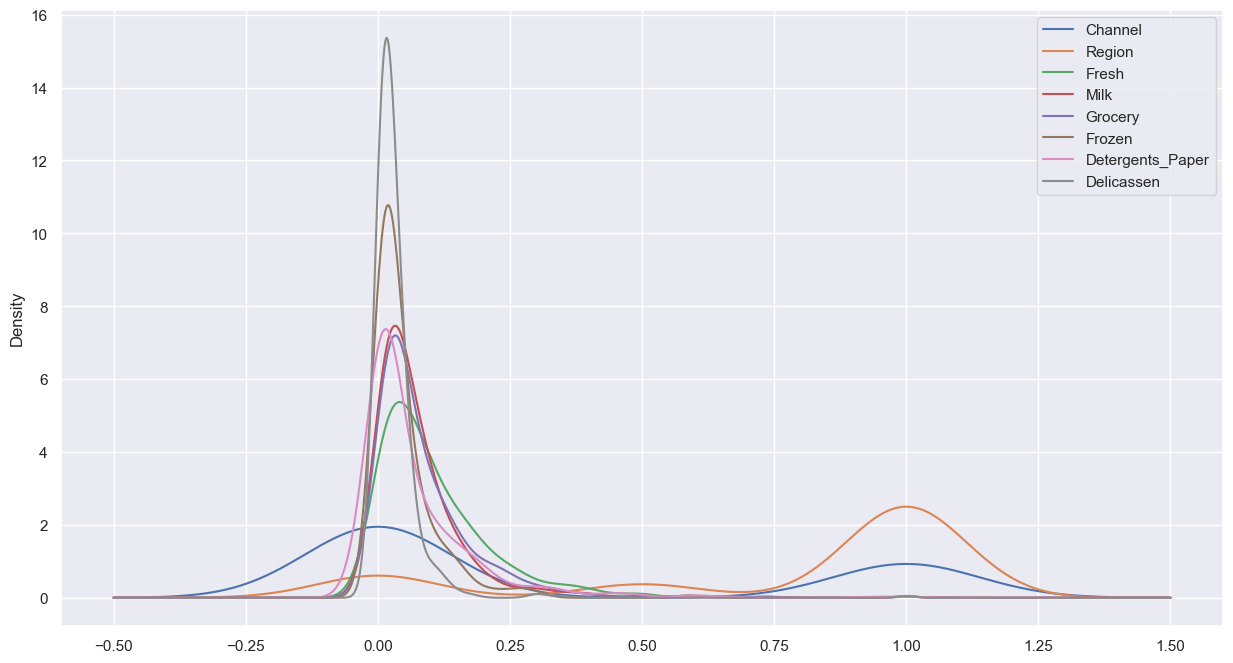

In [21]:
#Plotting the scaled features which we scaled using MinMaxScalar method

pd.DataFrame(MinMax_scaled_features).plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

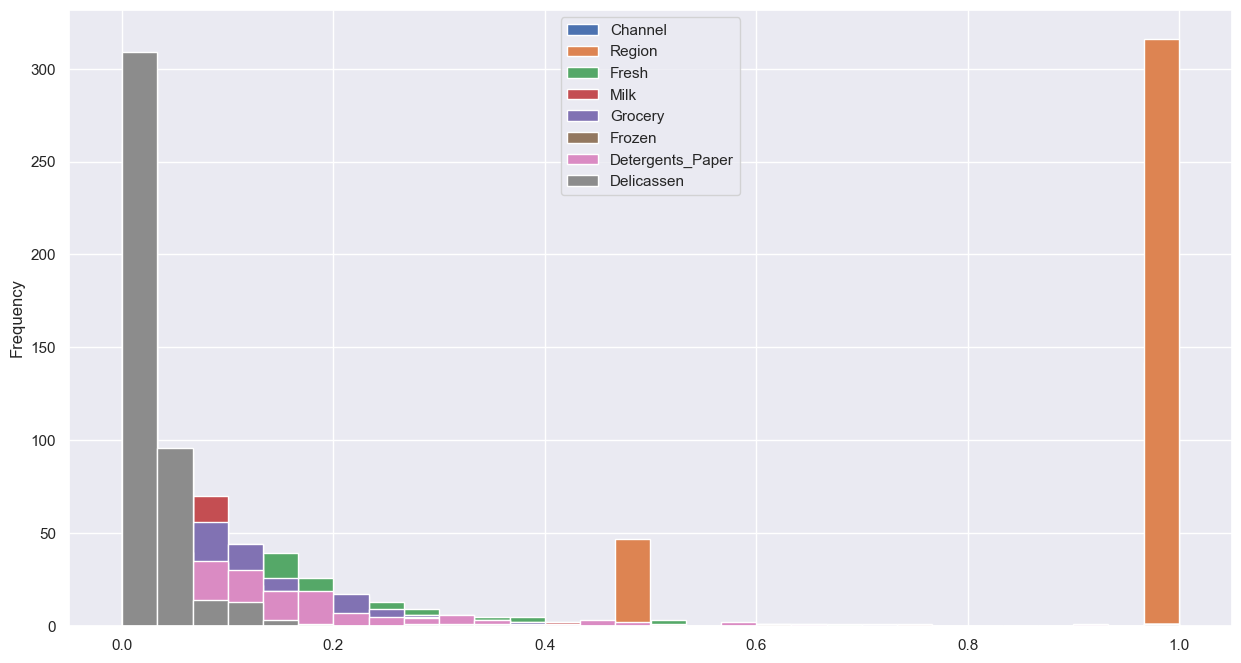

In [22]:
#Plotting the scaled features which we scaled using MinMaxScalar method

pd.DataFrame(MinMax_scaled_features).plot(kind='hist', bins=30)

We have scaled the features using MinMaxScalar method, which also converts the data into a uniform unit and neutralize the magnitude over all columns. The values of all the features have been transformed into a uniform range on the same scale.
______________________________________________________________________

After applying the scaler, every feature has the same scale.

The Standardscaler method scales the data to have a mean of mere 0 and a standard deviation of mere 1, assuming that the features are normally distributed. 

When using MinMaxScaler, data is shrunk to a range between -1 and 1 (if there are negative values), and it performs well if the standard deviation is low and the distribution is not Gaussian. MinMaxScalar is sensitive to outliers 

Centered curves are there with no outliers in Standard Scalar, whereas MinMaxScalar has outliers. We will therefore continue using the standard scaler here.

In [23]:
#Dropping categorical columns

continuous_df= df.drop(['Channel','Region'], axis=1)
continuous_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

<Figure size 1000x800 with 0 Axes>

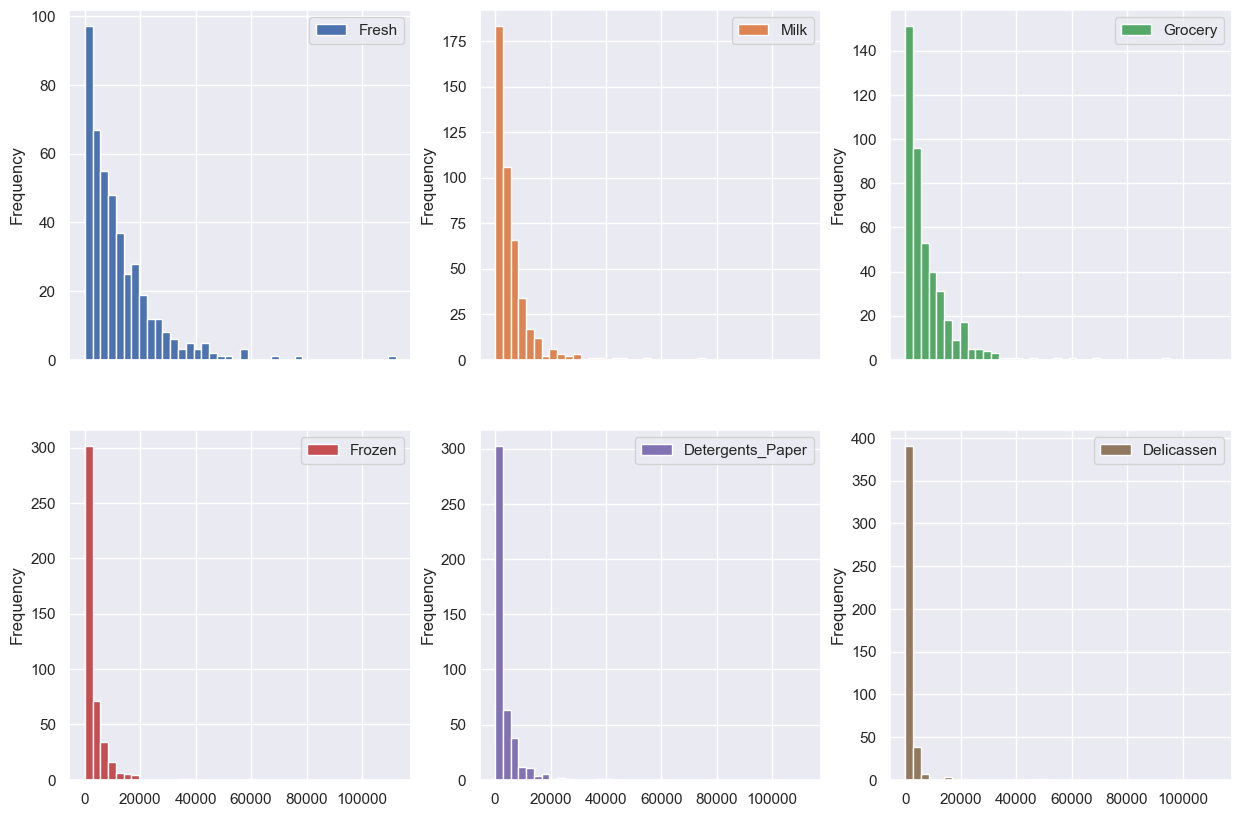

In [24]:
# Histogram of the continuous features

plt.figure(figsize=(10,8))

continuous_df.plot(kind='hist', alpha=1,bins=40, subplots=True, layout=(2,3),legend=True,figsize=(15,10))

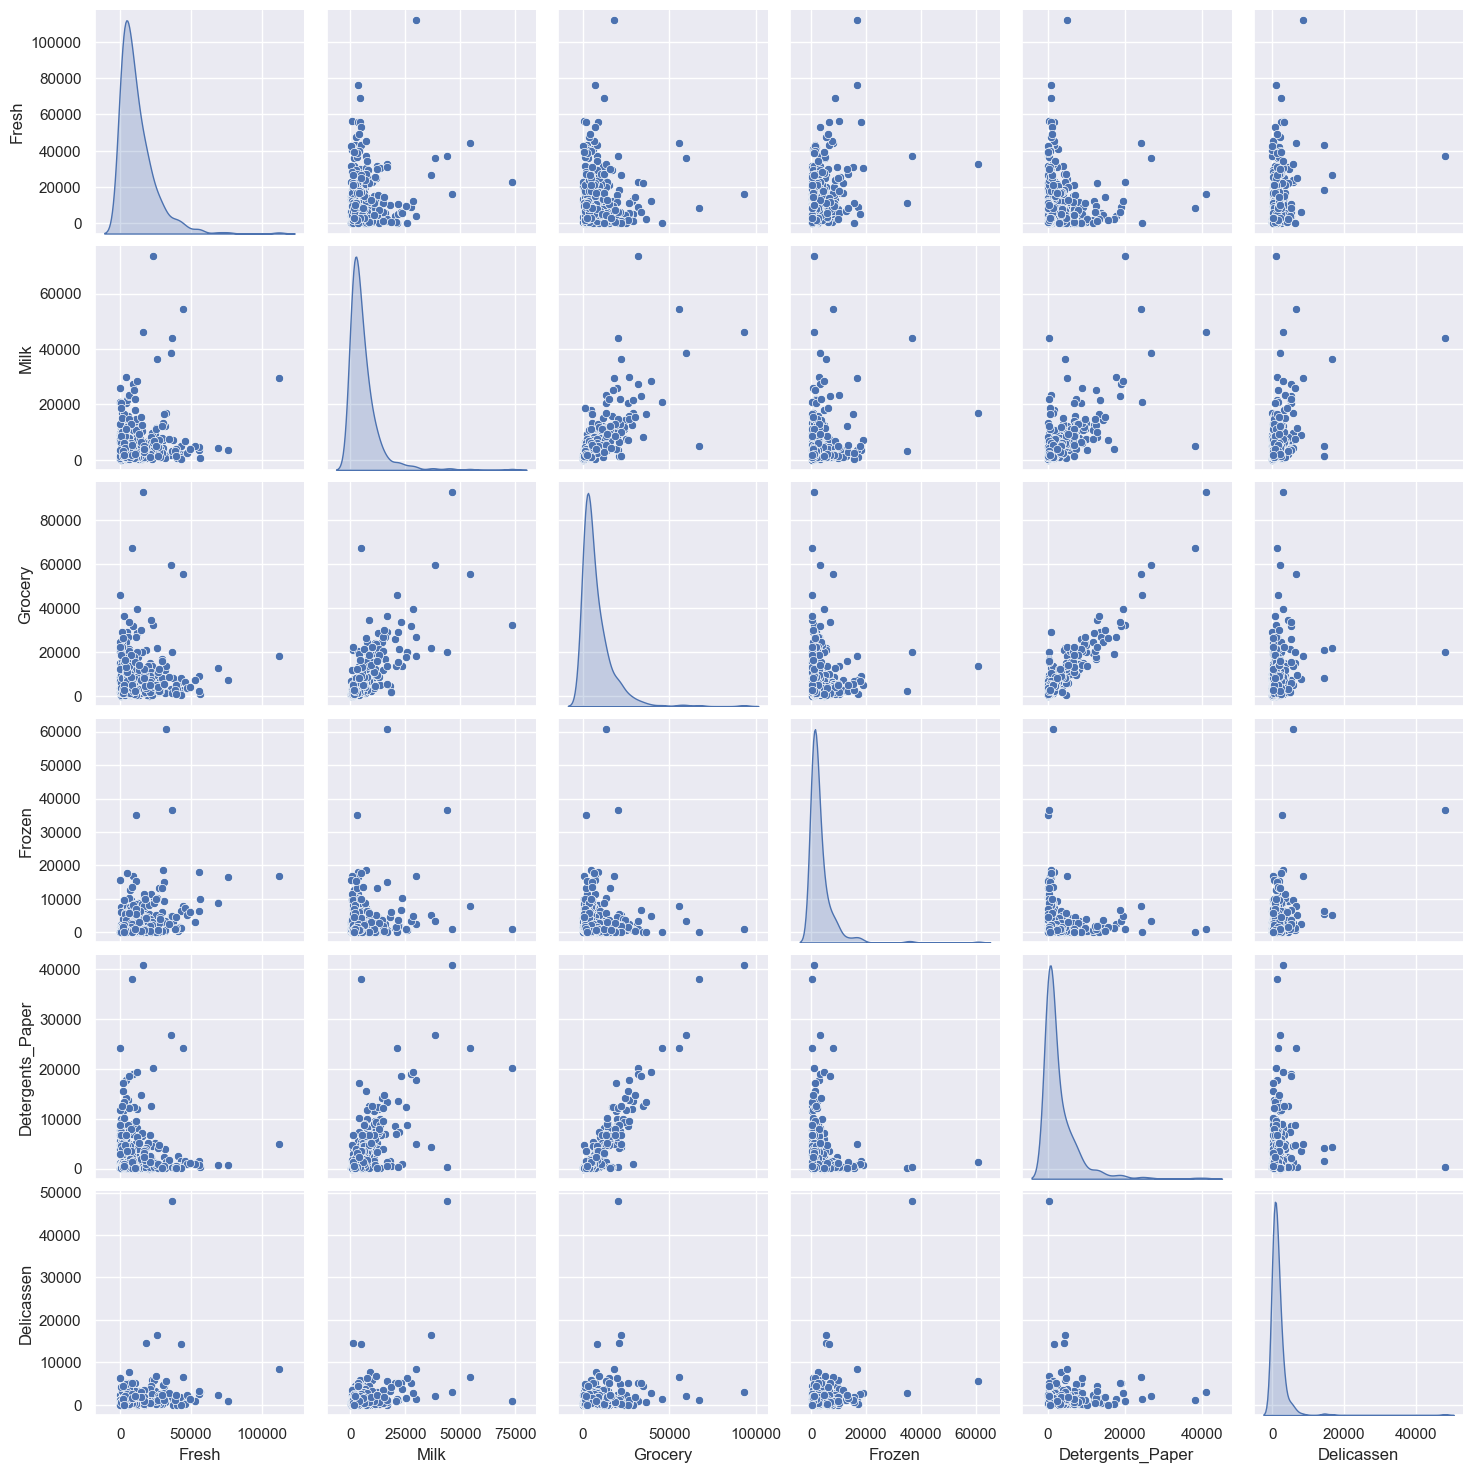

In [25]:
pairplot=sns.pairplot(continuous_df, diag_kind='kde')

Above shown graphs demonstrate an exponential drop in the volume of orders placed for the mentioned products. As a result, this may be a group of larger companies that make larger purchases of these particular goods.

#### Find optimal number of features using RFECV and show the plot between Number of features selected vs Cross validation score (use channel as target variable)

In [26]:
X = std_scaled_features.drop(['Channel'], axis=1)
y = df['Channel'] 

#Encoding Variables
encoded_num = {2 : 0, 1 : 1}

y = y.map(encoded_num)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

lr, knn = LinearRegression(), KNeighborsClassifier()

In [28]:
#Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

The default split is 75% for the training set and 25% for the testing set.

In [29]:
print("Linear Regression:", lr.fit(X_train, y_train).score(X_test, y_test))
print("Random Forest Classifier: ", RandomForestClassifier().fit(X_train, y_train).score(X_test, y_test))
print("K-Nearest Neighbours:", knn.fit(X_train, y_train).score(X_test, y_test))
print("Gradient Boosting Classifier: ", GradientBoostingClassifier().fit(X_train, y_train).score(X_test, y_test))

Linear Regression: 0.26124123681110145
Random Forest Classifier:  0.9
K-Nearest Neighbours: 0.9
Gradient Boosting Classifier:  0.9090909090909091


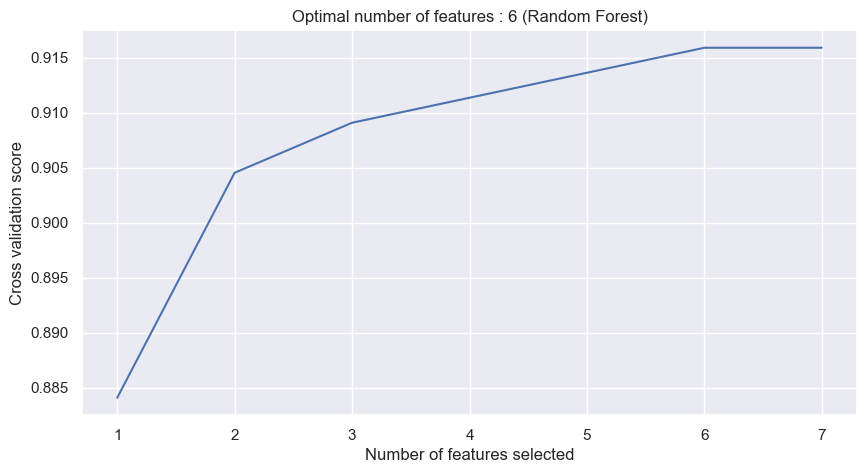

In [30]:
#Using RFECV with the estimator Random Forest Classifier.

rf = RandomForestClassifier()
rfecv_rf = RFECV(estimator=rf)
rfecv_rf.fit(X, y)

# Plotting number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv_rf.cv_results_["mean_test_score"]) + 1), rfecv_rf.cv_results_["mean_test_score"])
plt.title("Optimal number of features : %d (Random Forest)" % rfecv_rf.n_features_)
plt.show()

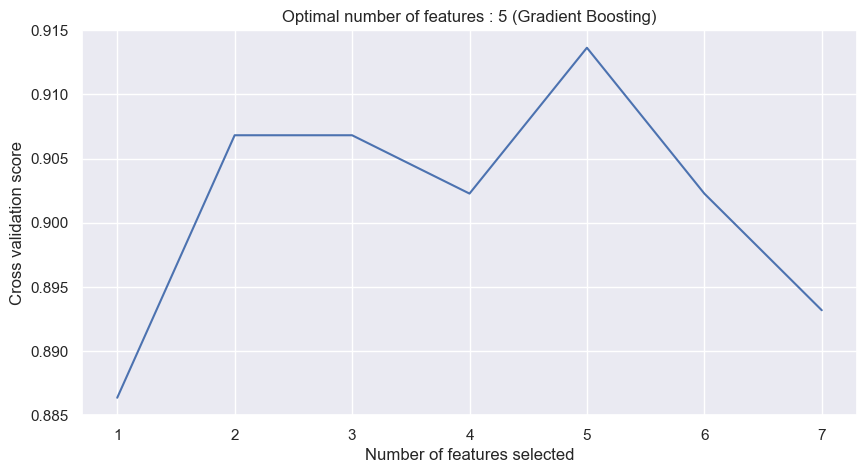

In [31]:
#Using RFECV with the estimator Gradient Boosting Classifier.

gbc = GradientBoostingClassifier()
rfecv_gbc = RFECV(estimator=gbc)
rfecv_gbc.fit(X, y)

# Plotting number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv_gbc.cv_results_["mean_test_score"]) + 1), rfecv_gbc.cv_results_["mean_test_score"])
plt.title("Optimal number of features : %d (Gradient Boosting)" % rfecv_gbc.n_features_)
plt.show()

### RFECV (Recursive Feature Elimination with Cross-Validation )

Feature selection becomes very crucial while training the machine learning model, therefore which features should be selected to train the model, which needs to be eliminated, also plays significant role since the optimal numbers of features ultimately leads to improved model accuracy which can be obtained via feature importance. 

It would be really convenient if we could automatically select the number of features rather than having to manually select it. Here, RFECV can be used to accomplish this.

In [32]:
from sklearn.pipeline import Pipeline #using pipline to avoid data leakage
from sklearn.model_selection import RepeatedStratifiedKFold #for repeated stratified cross-validation
from sklearn.model_selection import cross_val_score 
from sklearn.feature_selection import RFE 

In [33]:
pipeline = Pipeline([('Feature Selection', rfecv_gbc), ('Model', gbc)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
n_scores = cross_val_score(pipeline, X,y, scoring='accuracy', cv=cv, n_jobs = -1)
np.mean(n_scores)

0.903181818181818

In [34]:
#Fitting the pipeline

pipeline.fit(X,y)

Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=GradientBoostingClassifier())),
                ('Model', GradientBoostingClassifier())])

In [35]:
#printing the optimal numbers of featuers

print("Optimal number of features : %d" % rfecv_gbc.n_features_)

Optimal number of features : 5


In [36]:
#Checking which features were selected
rfecv_gbc.support_

array([False, False,  True,  True,  True,  True,  True])

In [37]:
#Ranking the features

ranking = pd.DataFrame(rfecv_gbc.ranking_, index=X.columns, columns = ['Rank']).sort_values(by='Rank', ascending=True)
ranking.head(10)

,Rank
Milk,1
Grocery,1
Frozen,1
Detergents_Paper,1
Delicassen,1
Fresh,2
Region,3


From the information stated above, we can clearly infer that Milk, Grocery, Frozen, Detergents_Paper, Delicassen are optimal features.

### K-Means Clustering (K=2 to K=15)

In [38]:
from sklearn.cluster import KMeans

In [39]:
sum_square = [] #Within-Cluster Sum of Square
K = range(2,16)
for k in K:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(std_scaled_features) 
    sum_square.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_

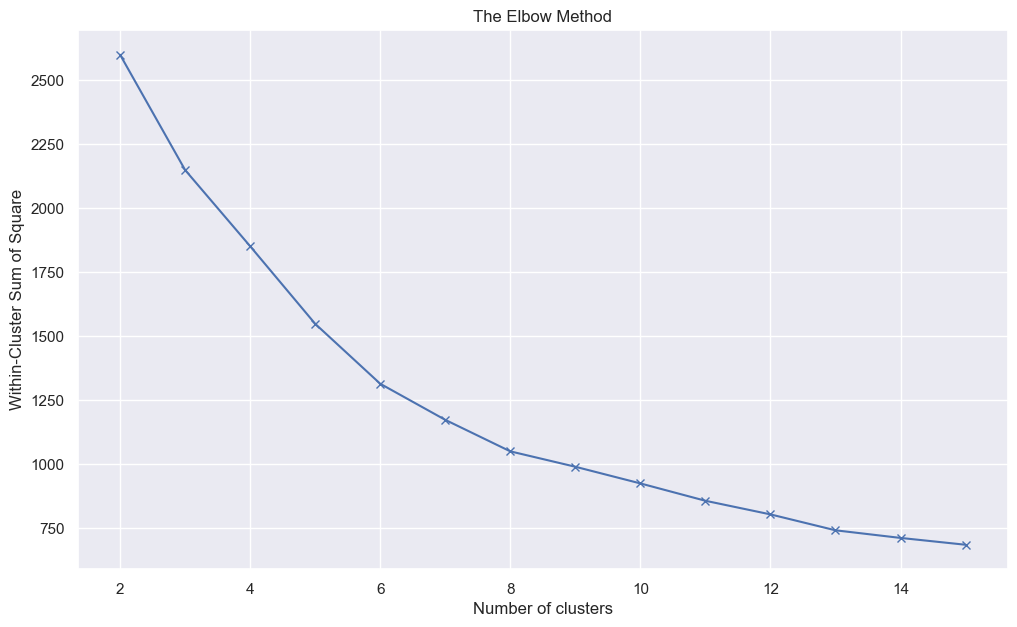

In [40]:
plt.figure(figsize=(12,7))
plt.plot(K, sum_square, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.show()

The elbow point comes at 6, therefore we will be using 6 numbers of clusters 

In [41]:
kmeans = KMeans(n_clusters = 6,random_state = 42)
y_means = kmeans.fit(std_scaled_features)

In [42]:
print('SSE: ', kmeans.inertia_) #the sum of the squared Euclidean distances of each point to its closest centroid
print('\nCentroids: \n', kmeans.cluster_centers_)

SSE:  1314.8913838359533

Centroids: 
 [[-6.90297086e-01  5.90668285e-01 -2.16616886e-01 -3.80006924e-01
  -4.76249417e-01 -8.32741037e-02 -4.44672309e-01 -1.79350114e-01]
 [ 1.44865163e+00  1.66562579e-01 -3.35427763e-01  4.58126517e-01
   6.73224816e-01 -3.49684911e-01  6.89164252e-01  4.76614618e-02]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]
 [-5.77720838e-01  2.84430211e-01  2.24499548e+00 -7.35112400e-02
  -2.04298800e-01  1.28561554e+00 -4.02219973e-01  4.70290526e-01]
 [-5.67368999e-01 -1.57920251e+00 -1.11632825e-01 -3.54548397e-01
  -4.04418651e-01  3.33152868e-02 -4.24041671e-01 -1.52151186e-01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]]


In [43]:
#Number of data records in individual clusters
pd.Series(kmeans.labels_).value_counts()

0    179
1    125
4     87
3     38
5     10
2      1
dtype: int64

#### Implement PCA with number of original features to answer how much variance is explained by first 2 components and by first 4 components and visualize the clusters in the data

In [44]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(std_scaled_features)
pca.n_components_

6

([<matplotlib.axis.XTick at 0x1d7025cf580>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

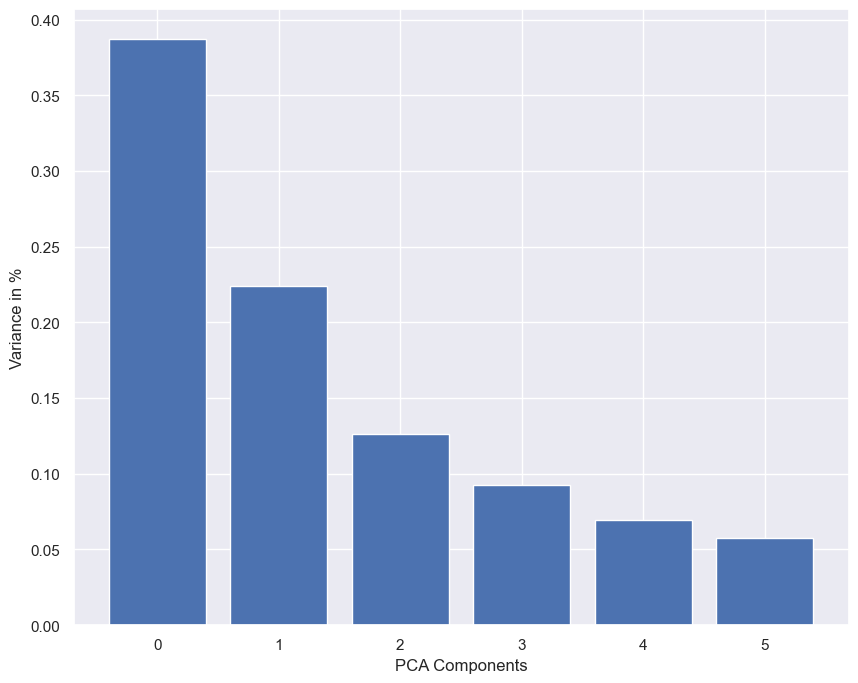

In [45]:
features = range(pca.n_components_)

plt.figure(figsize=(10,8))

plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA Components')
plt.ylabel('Variance in %')
plt.xticks(features)

In [46]:
pca_2 = PCA(n_components=2).fit(std_scaled_features)
pca_2d = pca_2.transform(std_scaled_features)

In [47]:
print("Explained variance is:",pca_2.explained_variance_)
print("Explained variance ratio",pca_2.explained_variance_ratio_)

Explained variance is: [3.10707136 1.79404441]
Explained variance ratio [0.38750123 0.22374588]


Variance for the first component is 38.75%, whereas for second component, variance is 22.37%

In [48]:
pca_4 = PCA(n_components=4).fit(std_scaled_features)
pca_4d = pca_4.transform(std_scaled_features)

print("Explained variance is:",pca_4.explained_variance_)
print("Explained variance ratio is:",pca_4.explained_variance_ratio_)

Explained variance is: [3.10707136 1.79404441 1.0140786  0.74007428]
Explained variance ratio is: [0.38750123 0.22374588 0.12647173 0.09229904]


Variance for the rest of the components are 12.65% and 9.23% respectively.

#### Cluster Visualization

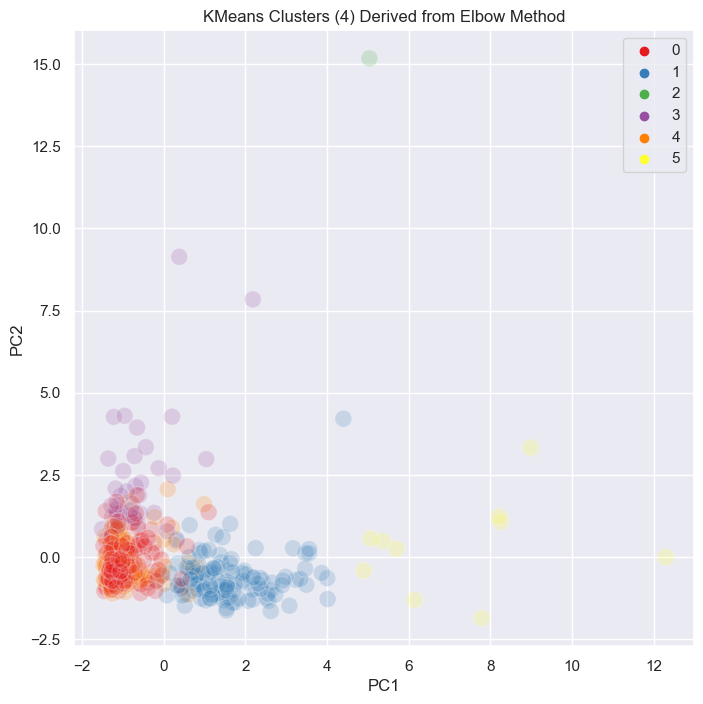

In [49]:
plt.figure(figsize = (8,8))
sns.scatterplot(pca_4d[:,0], pca_4d[:,1], 
                hue=y_means.labels_, 
                palette='Set1',
                s=150, alpha=0.2).set_title('KMeans Clusters (4) Derived from Elbow Method', fontsize=12)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

We can see from the results shown above that the principal component 1 stores 38.75% of the information, whereas the principle components 2 and 3 and 4 hold just 22.37%, 12%, and 9%, respectively.

#### Q. Implement XGBoost Classifier with 5 Fold CV and report the performance metrics

In [50]:
X = std_scaled_features.drop('Channel', axis=1)
y = df['Channel']

X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [51]:
#Encoding Variables
encoded_num = {2 : 0, 1 : 1}

y = y.map(encoded_num)

In [52]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

### K-Fold Cross Validation using XGBoost (K=5)

In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [54]:
xgb = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

#### Reporting the performance metrics

In [55]:
score = cross_val_score(xgb, X, y, cv=kfold)

In [56]:
precision_score = cross_val_score(xgb, X, y, cv=kfold, scoring='precision_weighted')
recall_score = cross_val_score(xgb, X, y, cv=kfold, scoring='recall_weighted')

Accuracy = score.mean()*100
Recall = (round((recall_score.mean()*100),3))
Precision = (round((precision_score.mean()*100),3))

f1_score=round(2*((Recall*Precision)/(Recall+Precision)),3)

In [57]:
print(" Accuracy= %f,\n Recall=%f,\n Precision=%f,\n f1score=%f" % (Accuracy,Recall,Precision,f1_score))

 Accuracy= 91.136364,
 Recall=91.136000,
 Precision=91.824000,
 f1score=91.479000
